# Analysis of the GDP and Life Expectancy of countries from 2000-2014

## Loading and processing the data

In [1]:
#Importing the libraries and loading the data

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Data = pd.read_csv("all_data.csv")

In [2]:
#Initial Analysis of the data
print(Data.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


In [3]:
#Data types of all the columns and basic statistical analysis
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [4]:
Data = Data.rename({"Life expectancy at birth (years)":"LE"}, axis = "columns")
print(Data.head())

  Country  Year    LE           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


### Observations: 
* The data consists of four columns 
* There aren't any missing values in our data 
* We have one categorical data and 3 numerical data

## Data Exploration Phase 
### Initial Analysis of the GDP Vs Life Expectancy by country

In [5]:
Chile = Data[Data.Country == "Chile"]
China = Data[Data.Country == "China"]
Germany = Data[Data.Country == "Germany"]
Mexico = Data[Data.Country == "Mexico"]
USA = Data[Data.Country == "United States of America"]
Zimbabwe = Data[Data.Country == "Zimbabwe"]

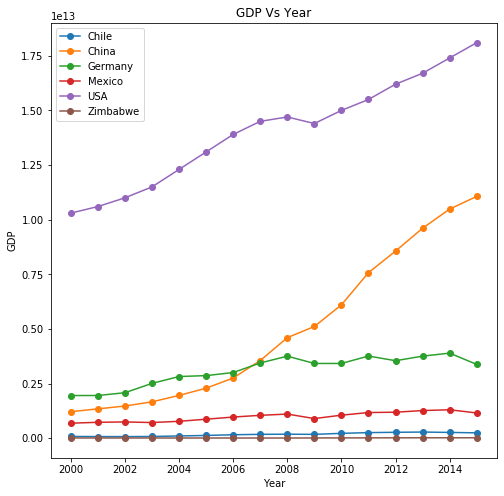

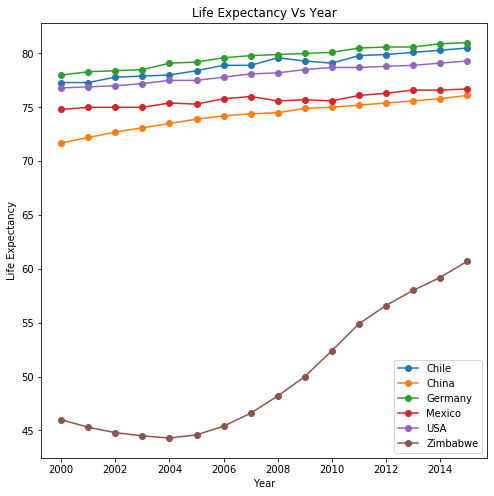

In [6]:
#Line chart of the GDP of each country 
fig1 = plt.figure(figsize =(8, 8))
ax1 = plt.subplot(111)
plt.plot(Chile.Year, Chile.GDP,marker = 'o')
plt.plot(China.Year, China.GDP,marker = 'o')
plt.plot(Germany.Year, Germany.GDP,marker = 'o')
plt.plot(Mexico.Year, Mexico.GDP,marker = 'o')
plt.plot(USA.Year,USA.GDP,marker = 'o')
plt.plot(Zimbabwe.Year, Zimbabwe.GDP,marker = 'o')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Vs Year")
plt.legend(['Chile','China','Germany','Mexico','USA','Zimbabwe'])
plt.show()

#Line chart of the Life Expectancy of each country 
fig2 = plt.figure(figsize =(8,8))
ax2 = plt.subplot(111)
plt.plot(Chile.Year, Chile.LE ,marker = 'o')
plt.plot(China.Year, China.LE, marker = 'o')
plt.plot(Germany.Year, Germany.LE, marker = 'o')
plt.plot(Mexico.Year, Mexico.LE, marker = 'o')
plt.plot(USA.Year,USA.LE, marker = 'o')
plt.plot(Zimbabwe.Year, Zimbabwe.LE, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Vs Year")
plt.legend(['Chile','China','Germany','Mexico','USA','Zimbabwe'])
plt.show()

### Q1) Is there a correlation between GDP and Life Expectancy?

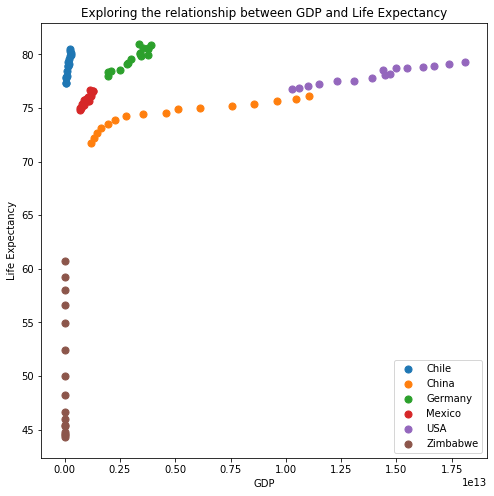

In [7]:
fig3 = plt.figure(figsize=(8,8))
ax3 = plt.subplot(111)

plt.scatter(x = Chile.GDP, y = Chile.LE, s=50)
plt.scatter(x = China.GDP, y = China.LE, s=50)
plt.scatter(x = Germany.GDP, y = Germany.LE, s=50)
plt.scatter(x = Mexico.GDP, y = Mexico.LE, s=50)
plt.scatter(x = USA.GDP, y = USA.LE, s=50)
plt.scatter(x = Zimbabwe.GDP, y = Zimbabwe.LE, s=50)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.legend(['Chile','China','Germany','Mexico','USA','Zimbabwe'])
plt.title("Exploring the relationship between GDP and Life Expectancy")
plt.show()

### Q2) Did the developing world do a better job in increasing their people's life expectany?

In [8]:
Chile5 = Chile[Chile.Year % 5 == 0]
China5 = China[China.Year % 5 == 0]
Germany5 = Germany[Germany.Year % 5 == 0]
Mexico5 = Mexico[Mexico.Year % 5 == 0]
USA5 = USA[USA.Year % 5 == 0]
Zimbabwe5 = Zimbabwe[Zimbabwe.Year % 5 == 0]
index = ['00','05','10','15']
Chile5.index = index
China5.index = index
Germany5.index = index
Mexico5.index = index
USA5.index = index
Zimbabwe5.index = index

In [9]:
print(Chile5)

   Country  Year    LE           GDP
00   Chile  2000  77.3  7.786093e+10
05   Chile  2005  78.4  1.229650e+11
10   Chile  2010  79.1  2.185380e+11
15   Chile  2015  80.5  2.425180e+11


In [10]:
#Average increase in GDP of the developing countries and developed countries 
developed_countries = [Chile5, Germany5, USA5]
developing_countries = [China5, Mexico5, Zimbabwe5]
LP1 = []
LP2 = []
for country in developed_countries:
    diff_year = country.loc['15','LE'] - country.loc['00','LE']
    LP1.append(diff_year)
    
for country in developing_countries:
    diff_year = country.loc['15','LE'] - country.loc['00','LE']
    LP2.append(diff_year)

Average_LP_developing = sum(LP2)/len(LP2)
Average_LP_developed = sum(LP1)/len(LP1)
grouped = ['Developed', 'Developing']
x = np.arange(len(grouped))
values = [Average_LP_developed, Average_LP_developing]

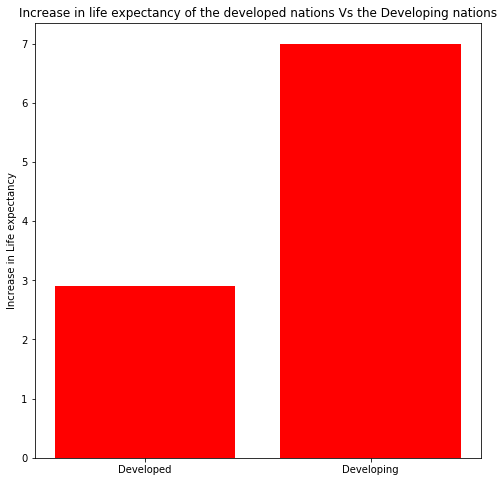

In [11]:
fig3 = plt.figure(figsize =(8, 8))
ax3 = plt.subplot(111)
plt.bar(x,values, color = 'r', width = 0.8) 
plt.ylabel("Increase in Life expectancy")
plt.title("Increase in life expectancy of the developed nations Vs the Developing nations")
ax3.set_xticks(x)
ax3.set_xticklabels(grouped)
plt.show()

### Q3) Does a greater rise in GDP lead to a greater rise in the life expectancy?

In [12]:
diff_GDP_LE = {}
GDPDiff= []
LEDiff = []
countries = [Chile5, Germany5, USA5, China5, Mexico5, Zimbabwe5 ]
for c in countries:
    diff_GDP = c.loc['15','GDP'] - c.loc['00','GDP']
    times_GDP = diff_GDP/(c.loc['00','GDP'])
    round_GDP = round(times_GDP,2)
    diff_LE = c.loc['15','LE'] - c.loc['00','LE']
    round_LE = round(diff_LE,2)
    GDPDiff.append(round_GDP)
    LEDiff.append(round_LE) 
    diff_GDP_LE[c.Country[1]] = [round_GDP, round_LE]
    
print(diff_GDP_LE)

{'Chile': [2.11, 3.2], 'Germany': [0.73, 3.0], 'United States of America': [0.76, 2.5], 'China': [8.13, 4.4], 'Mexico': [0.69, 1.9], 'Zimbabwe': [1.44, 14.7]}


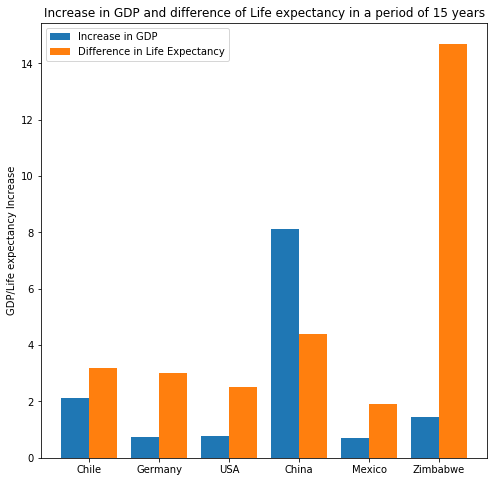

In [13]:
count = ["Chile","Germany","USA","China", "Mexico","Zimbabwe"]
fig4 = plt.figure(figsize = (8,8))
ax4 = plt.subplot(111)
x = np.arange(len(countries))
plt.bar(x-0.2, GDPDiff, 0.4, label="Increase in GDP")
plt.bar(x+0.2, LEDiff, 0.4, label = "Difference in Life Expectancy")
plt.legend()
plt.xticks(x, count)
plt.ylabel("GDP/Life expectancy Increase")
plt.title("Increase in GDP and difference of Life expectancy in a period of 15 years")
plt.show()

###  Q4) Which country was responsible for improving the quality of life of their citizens the most?


Text(0.5, 1.0, 'Increase in GDP by country')

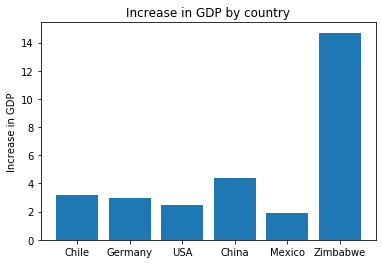

In [14]:
plt.bar(x,LEDiff)
plt.xticks(x, count)
plt.ylabel("Increase in GDP")
plt.title("Increase in GDP by country")